# Course: Deep Learning
# Author: Sandro Camargo <sandrocamargo@unipampa.edu.br>
# Single Neuron Linear Regression Example
# Dataset: https://archive.ics.uci.edu/dataset/186/wine+quality
Cite: Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

A Python library is a collection of related functions. A library contains bundles of encapsuated code which can be used repeatedly in different programs.

In [1]:
!pip install ucimlrepo

# Import Libraries
import keras # Neural Network Library
from keras import layers # Layers to a neural network
from keras import optimizers # optimizers
import pandas as pd # Data Manipulation library
import numpy as np # Fast Numeric Computing library
import tensorflow as tf # Optimizers
import matplotlib.pyplot as plt # Plot library

Reading the dataset

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
dtypes: float64(11)
memory usage: 421.0 KB


The dataset must be randomly splitted in two parts: training set and testing set. The main approaches to split are holdout and n-fold cross validation.
*   Training set is used for building (training) the model.
*   Testing set is used for testing the generalization ability of the model built.

Moreover, inputs($x$) and outputs($y$) must be splitted in each set.


In [4]:
np.random.seed(1) # Random numbers will be ever the same
rnd = np.random.rand(len(X)) < 0.8 # Training set will contain 80% of the data

# Creating the training dataset (80%)
train_x = X[rnd]
train_y = y[rnd]

# Creating the testing dataset (20%)
test_x = X[~rnd]
test_y = y[~rnd]

# Verifying dataset dimensions
print('The training dataset (inputs) dimensions are: ', train_x.shape)
print('The training dataset (outputs) dimensions are: ', train_y.shape)
print('The testing dataset (inputs) dimensions are: ', test_x.shape)
print('The testing dataset (outputs) dimensions are: ', test_y.shape)

The training dataset (inputs) dimensions are:  (3929, 11)
The training dataset (outputs) dimensions are:  (3929, 1)
The testing dataset (inputs) dimensions are:  (969, 11)
The testing dataset (outputs) dimensions are:  (969, 1)


After creating the datasets, the next step is defining the architecture of our model.

It must be defined:


*   Architecture: in terms of neurons and layers
*   Optimizer: is the algorithm or method used to change the weights in order to minimize the loss function.

The last step is compiling the model. In this step the loss function, the optimizer and the evaluation metrics must be defined.

In [5]:
# Function to define model architecture
def build_model():
  # Defining the architecture
  # Sequential = Feedforward Neural Network
  # 1 single neuron
  # input_shape is the amount of columns from training set
  model = keras.Sequential([
        layers.Dense(1, input_shape = [len(train_x.columns)])
  ])

  # Defining the optimizer
  optimizer = tf.keras.optimizers.RMSprop(
      learning_rate = 0.001)

  # Mean Squared Error (MSE) is the default loss function in regression models
  model.compile(loss = 'mse',
      optimizer = optimizer,
      metrics = ['mse','mae'])

  return model

Just for curiosity, you should observe how many parameters ($\theta$) your model has.
At this point, your model is built.

In [6]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


After creating the model, it must be trained (fitted).
Training is done using training set and the amount of epochs must be defined.

In [7]:
EPOCHS = 100

history = model.fit(
    train_x, train_y, epochs = EPOCHS, verbose = 1
)

Epoch 1/100
123/123 [==============================] - 1s 3ms/step - loss: 99.6885 - mse: 99.6885 - mae: 7.5387
Epoch 2/100
123/123 [==============================] - 0s 2ms/step - loss: 30.5792 - mse: 30.5792 - mae: 4.3605
Epoch 3/100
123/123 [==============================] - 0s 2ms/step - loss: 19.6164 - mse: 19.6164 - mae: 3.5220
Epoch 4/100
123/123 [==============================] - 0s 4ms/step - loss: 11.2254 - mse: 11.2254 - mae: 2.6715
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 5.3348 - mse: 5.3348 - mae: 1.8441
Epoch 6/100
123/123 [==============================] - 0s 2ms/step - loss: 2.1731 - mse: 2.1731 - mae: 1.1725
Epoch 7/100
123/123 [==============================] - 0s 2ms/step - loss: 1.0140 - mse: 1.0140 - mae: 0.7916
Epoch 8/100
123/123 [==============================] - 0s 2ms/step - loss: 0.7529 - mse: 0.7529 - mae: 0.6772
Epoch 9/100
123/123 [==============================] - 0s 2ms/step - loss: 0.7341 - mse: 0.7341 - mae: 0.6645
Ep

This plot should be generated just to inspect the learning convergence.
It is expected a decreasing of the loss function value through the epochs.

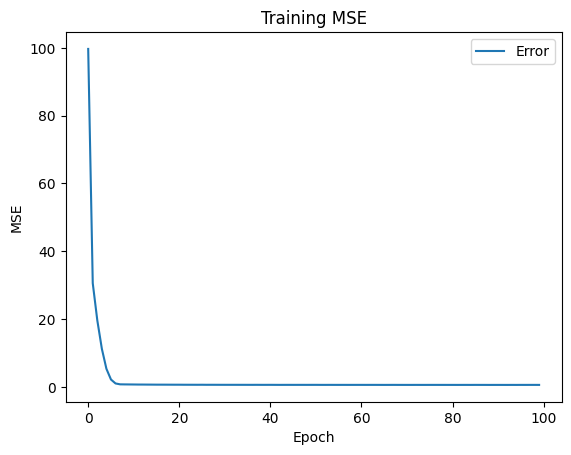

In [8]:
plt.plot(history.history['mse'])
plt.title('Training MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Error'], loc='upper right')
plt.show()

After the training process, the knowledge learnt by a neural network is stored in its weights.

[[-0.02710905]
 [-1.5279198 ]
 [ 0.18324296]
 [ 0.02590042]
 [-0.69015974]
 [ 0.00421755]
 [-0.00290455]
 [ 0.25538304]
 [ 0.60142434]
 [ 0.34051144]
 [ 0.3508584 ]]


Text(0.5, 0, 'Inputs')

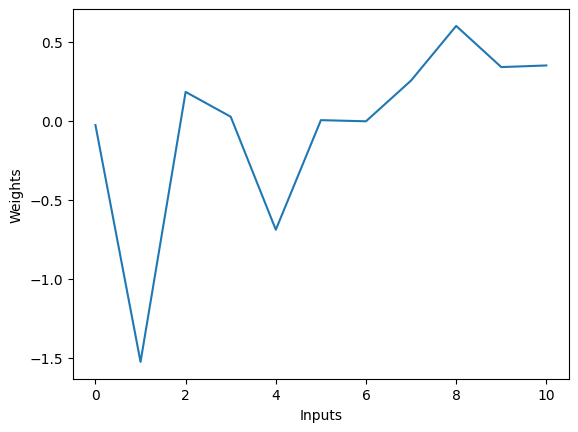

In [9]:
weights, biases = model.get_weights() # return a numpy list of weights
print(weights)
plt.plot(weights)
plt.ylabel('Weights')
plt.xlabel('Inputs')

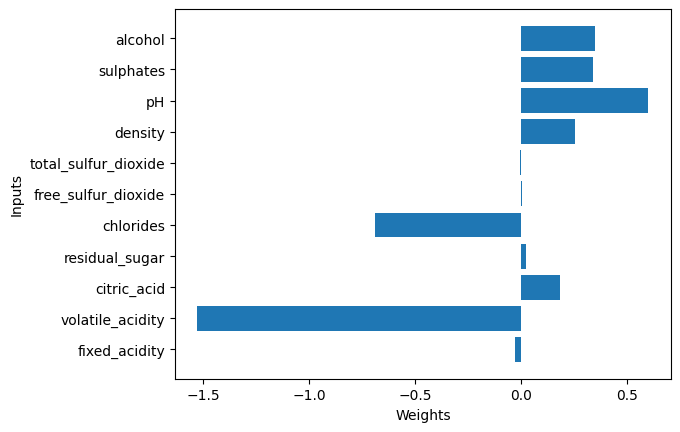

In [10]:
plt.barh(train_x.columns, weights[:,0].astype(float), align='center')
plt.xlabel("Weights")
plt.ylabel("Inputs")
#plt.title(target)
plt.savefig("NN-Weights.png")

After the training process, the model should be tested in order to measure its quality, it means, how good are its predictions. The model must be evaluated using the testing set, which is composed by samples that are not in the training set. In regression problems, the correlation coefficient is the default metric to measure the model quality.
The correlation coefficient is computed using real outputs ($y$) and predicted outputs ($\hat{y}$). Correlation coefficient can vary between 0 (bad predictions) and 1 (perfect predictions).

31/31 [==============================] - 0s 2ms/step


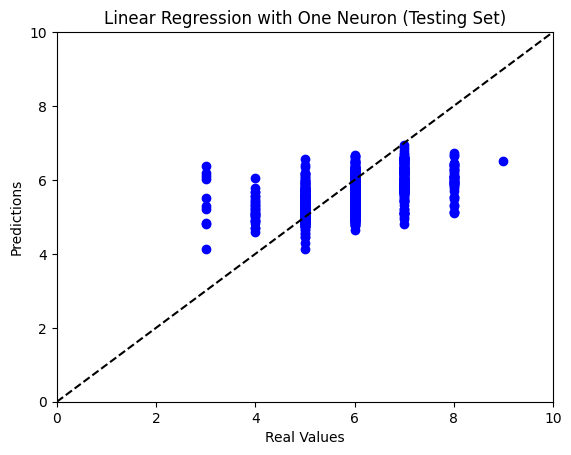

Correlation Coefficient in testing set: 0.5054


In [11]:
test_predictions = model.predict(test_x).flatten() # predict radon activities with the built linear regression model

plt.scatter(test_y, test_predictions, marker = 'o', c = 'blue')
plt.plot([0,10], [0,10], color = 'black', ls = '--')
plt.ylabel('Predictions')
plt.xlabel('Real Values')
plt.title('Linear Regression with One Neuron (Testing Set)')
plt.ylim(0, 10)
plt.xlim(0, 10)
plt.axis(True)
plt.show()

output = pd.DataFrame.to_numpy(test_y, copy=True)
print("Correlation Coefficient in testing set: %.4f" % np.corrcoef(test_predictions, np.transpose(output))[0,1])

123/123 [==============================] - 0s 2ms/step


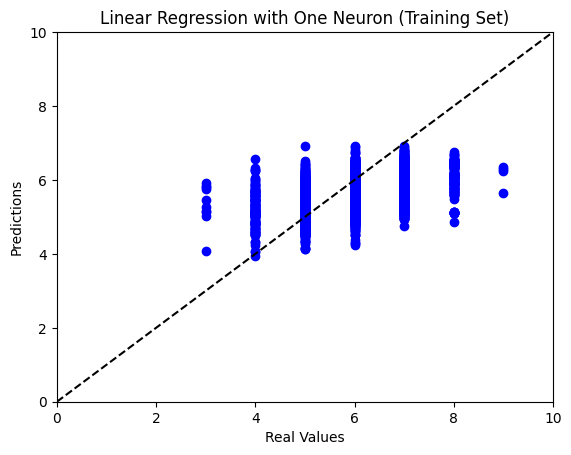

Correlation Coefficient in training set: 0.5104


In [12]:
train_predictions = model.predict(train_x).flatten() # predict radom activities with the built linear regression model

plt.scatter(train_y, train_predictions, marker = 'o', c = 'blue')
plt.plot([0,10], [0,10], color = 'black', ls = '--')
plt.ylabel('Predictions')
plt.xlabel('Real Values')
plt.title('Linear Regression with One Neuron (Training Set)')
plt.ylim(0, 10)
plt.xlim(0, 10)
plt.axis(True)
plt.show()

output = pd.DataFrame.to_numpy(train_y, copy=True)
print("Correlation Coefficient in training set: %.4f" % np.corrcoef(train_predictions, np.transpose(output))[0,1])